In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().stack()[lambda x: x].index.tolist()

[]

<Axes: xlabel='target', ylabel='count'>

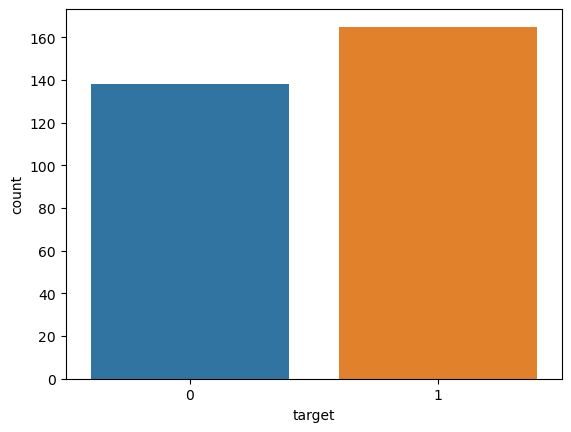

In [5]:
sns.countplot(data=df, x="target")

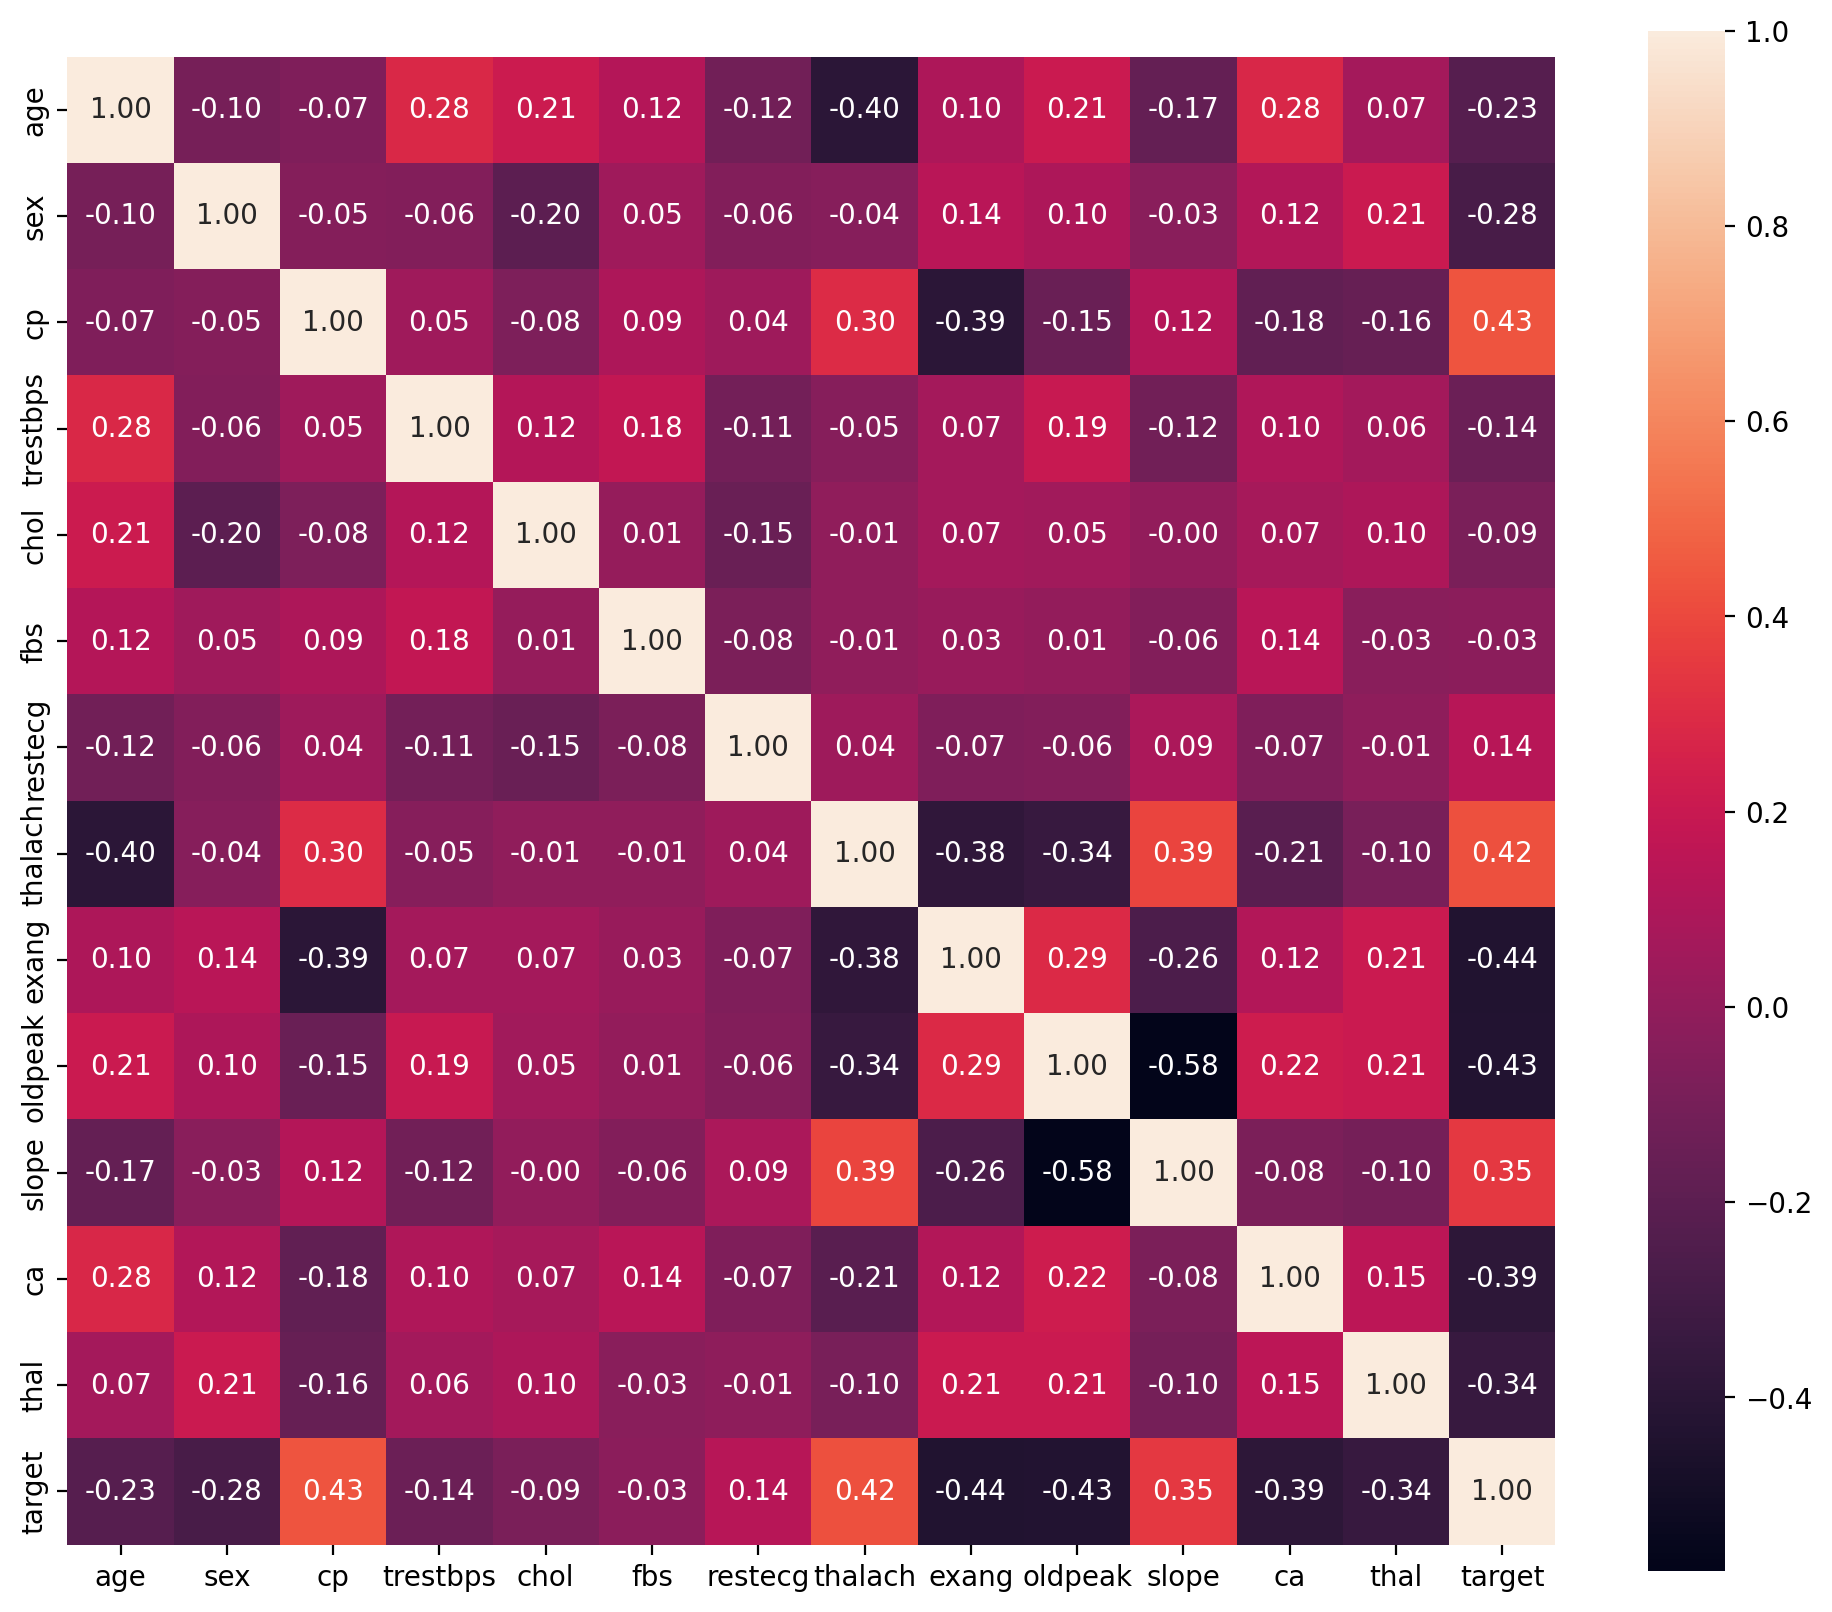

In [6]:
plt.figure(figsize=(12,10), dpi=200)
corr = df.corr()
sns.heatmap(data=corr,annot=True, square=True,fmt='.2f')
plt.show()

In [7]:
x= df.iloc[:,0:13].values 
y= df["target"].values  
print(x)
print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [8]:
age_distDf = pd.DataFrame()
age_distDf['age_range']  = pd.cut(x = df["age"],
                                  bins = [0,18,40,60,100],
                                  include_lowest = True,right=False,
                                  labels = ["child", "young", "adult", "old"])

age_distDf = pd.concat([age_distDf["age_range"],df['target']],axis=1)
age_distDf.head()

,age_range,target
0,old,1
1,young,1
2,adult,1
3,adult,1
4,adult,1


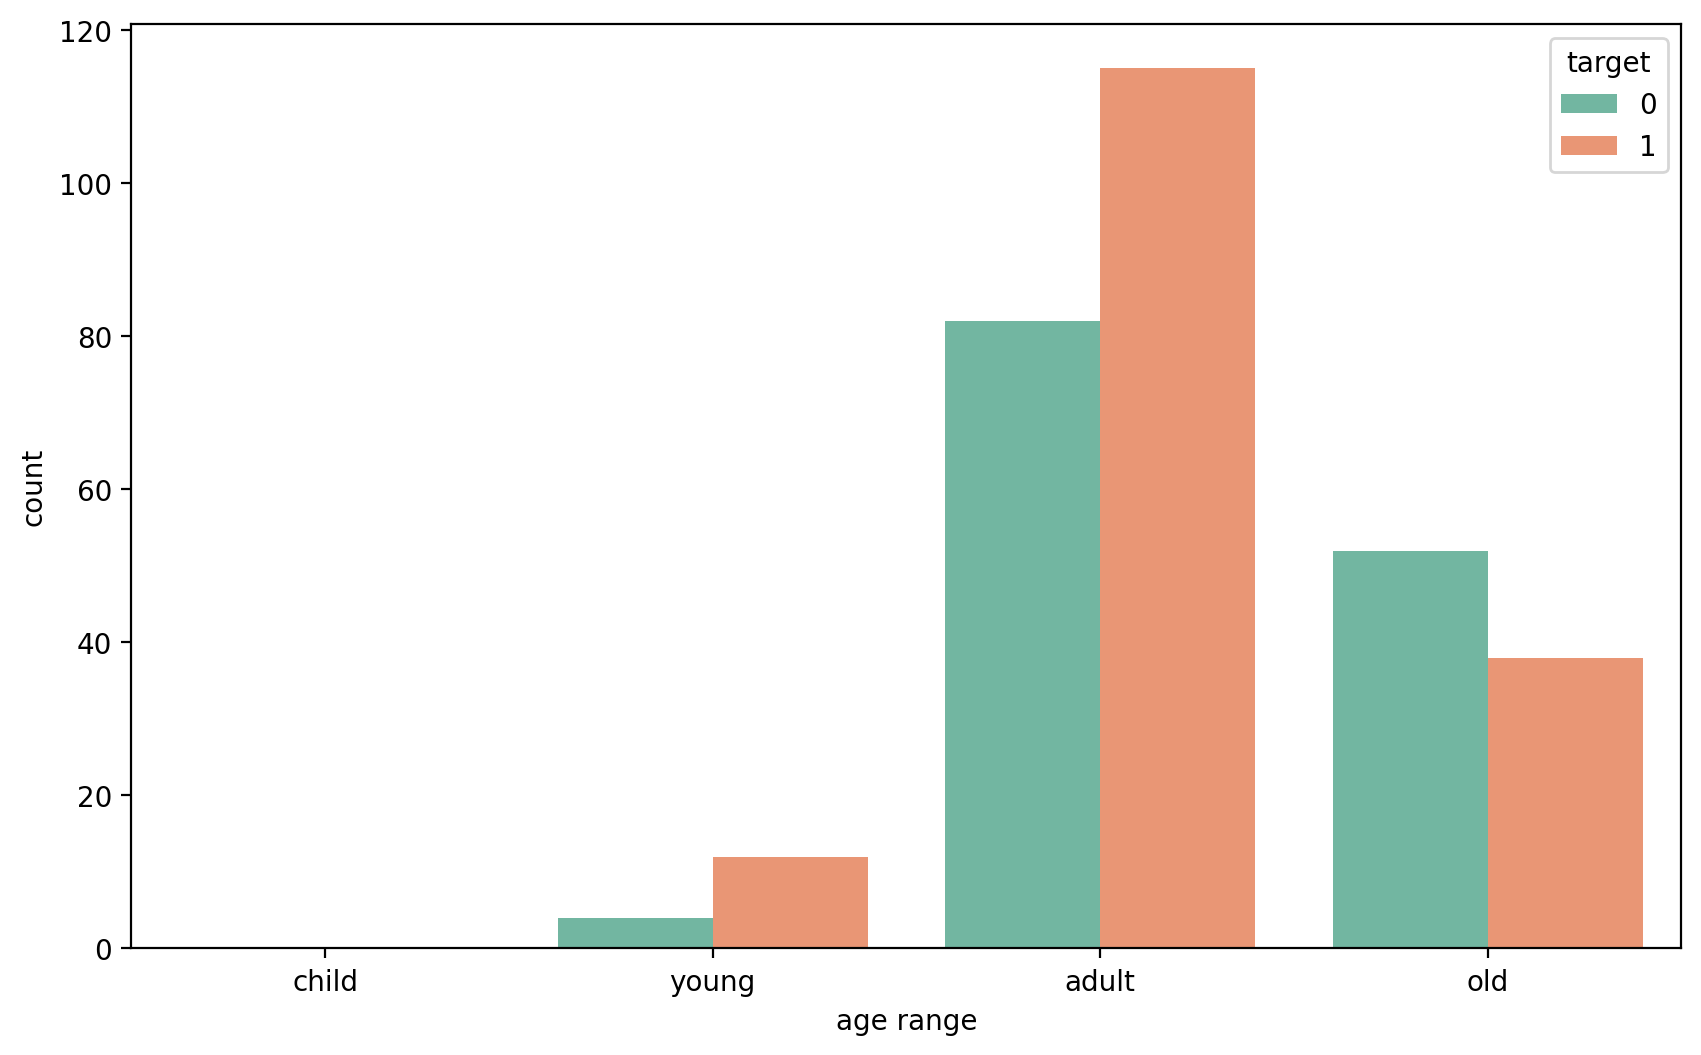

In [9]:
plt.figure(figsize=(10, 6), dpi=200)
sns.countplot(data=age_distDf,x='age_range',hue='target',palette='Set2')
plt.xlabel('age range')
plt.show()

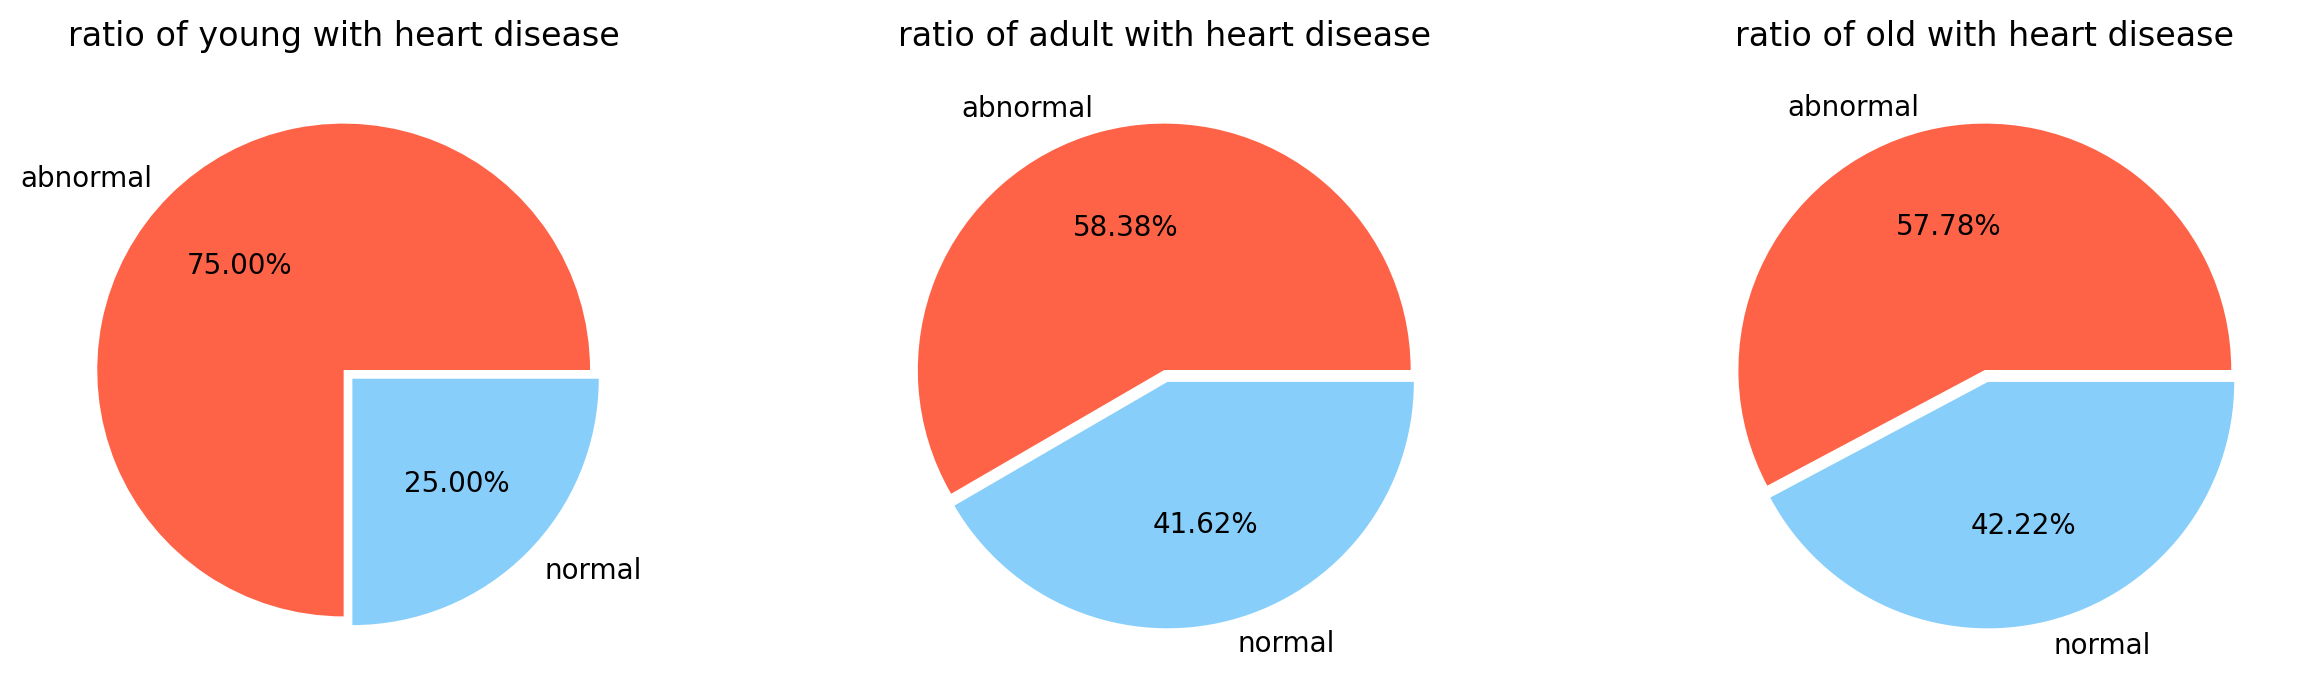

In [10]:
colors=['tomato','lightskyblue']

plt.figure(figsize = (3*5,1*4), dpi=200)


ax1 = plt.subplot(1,3,1)
youth =  age_distDf[age_distDf['age_range']=='young']['target'].value_counts()
plt.pie(youth,explode=[0,0.05],autopct='%.2f%%',labels=['abnormal','normal'],colors=colors)
plt.title('ratio of young with heart disease')


ax2 =  plt.subplot(1,3,2)
middle = age_distDf[age_distDf['age_range']=='adult']['target'].value_counts()
plt.pie(middle,explode=(0,0.05),autopct='%.2f%%',labels=['abnormal','normal'],colors=colors)
plt.title('ratio of adult with heart disease')

ax2 = plt.subplot(1,3,3)
old =  age_distDf[age_distDf['age_range']=='old']['target'].value_counts()
plt.pie(old,explode=[0,0.05],autopct='%.2f%%',labels=['abnormal','normal'],colors=colors)
plt.title('ratio of old with heart disease')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
print(len(x_train))
print(len(x_test))

227
76


In [12]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

Minimum error:- 0.13157894736842105 at K = 7


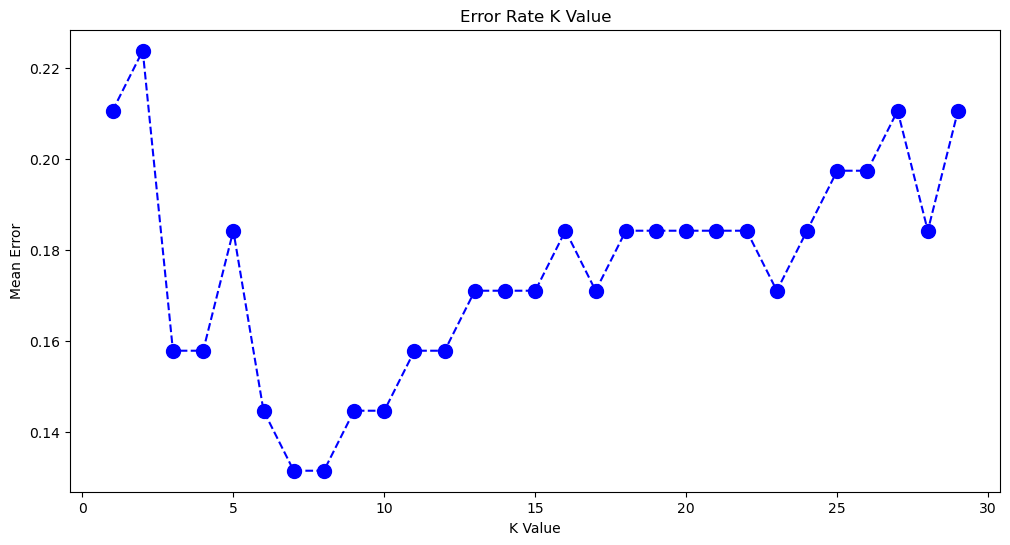

In [13]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [14]:
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=7)

In [15]:
y_pred= classifier.predict(x_test)  
print(y_pred)

[0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1]


In [16]:
from sklearn.metrics import confusion_matrix  

cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[26  7]
 [ 3 40]]


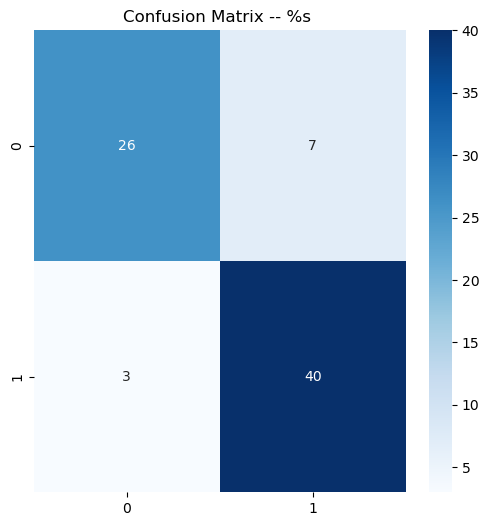

In [17]:
matrix = pd.DataFrame(confusion_matrix(y_test,y_pred))
plt.figure(figsize=(6, 6))

sns.heatmap(matrix,annot=True,cmap='Blues')
plt.title('Confusion Matrix -- %s ')
plt.show()

In [18]:
print(len(pred_i))

76


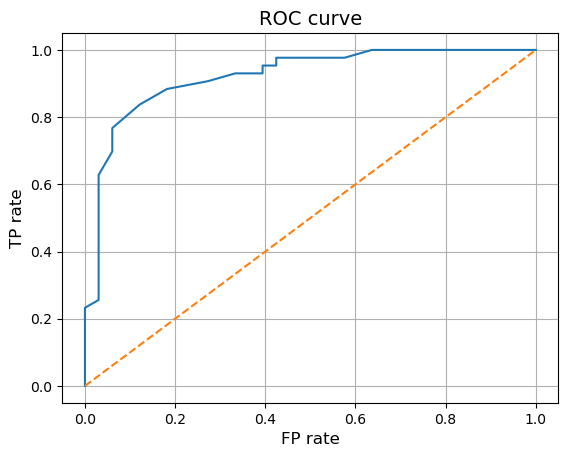

auc score: 0.8590556730091613


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

fprs,tprs,thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:, 1])
#plt.plot(fprs,tprs)
#plt.plot([0,1],linestyle='--')
plt.figure()
area = roc_auc_score(y_test,y_pred)
plt.plot(fprs,tprs)
plt.plot([0,1],linestyle='--')
plt.xlabel('FP rate',fontsize=12)
plt.ylabel('TP rate',fontsize=12)
plt.title('ROC curve',fontsize=14)
#plt.legend()
plt.grid()
plt.show()
print("auc score:", area)

In [20]:
accuracy_score(y_test, y_pred)


0.868421052631579